# Lab 6. Kamaletdinova Julia

In [1]:
library(ggplot2)
library(scales)
library(gridExtra)
library(MASS)
library(pca3d)
library(ggfortify)
library(cluster)
library(devtools)
library(factoextra)
library(e1071)
library(Hmisc)
library(ggpubr)

Loading required package: usethis

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following object is masked from ‘package:e1071’:

    impute


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: magrittr



In [2]:
df = read.table('nut_dataframe.csv', sep=',', header=TRUE, na.strings="NA")
head(df)

X,Germ,GBegF,BegFEndF,EndFBegM,BegMEndM,Height,Hlp,NoPodsWeight,PodsWeight,⋯,AscoRes,StemBr,StemL1ord,StemBr1ord,StemBr2ord,PodD,PodS,PodShape,SeedShape,SeedCol
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,-2.12899,-0.9808181,0.2691854,-0.1585673,-1.0883455,0.7900028,0.5494152,0.7037179,0.7337723,⋯,3,2,1,1,0,0,0,1,0,1
1,-2.12899,-0.6495050,0.2691854,-0.1585673,-1.7436236,0.6776419,-0.5445412,0.7527438,0.8547601,⋯,2,2,1,1,0,0,1,1,0,1
2,-2.12899,-0.6495050,0.2691854,-0.9909240,0.8774887,0.4529201,-0.5445412,0.3609298,0.4388255,⋯,2,2,1,1,0,0,1,1,0,1
3,-2.12899,0.6757476,-0.5464464,-0.4003575,-0.4330675,0.6776419,0.9869978,0.7633832,0.1432029,⋯,3,1,1,1,0,0,1,1,0,1
4,-2.12899,-1.3121313,0.4461669,-0.4003575,-1.0883455,-0.3336062,0.5494152,-0.8607554,-0.1032154,⋯,1,3,0,1,1,0,1,1,0,1
5,-2.12899,-0.9808181,0.6145117,-0.9909240,1.5327668,0.1158374,-0.5445412,-0.2002730,0.7816652,⋯,1,3,1,1,1,1,1,1,0,2


In [3]:
summary(df)

       X              Germ             GBegF            BegFEndF      
 Min.   :  0.0   Min.   :-2.1290   Min.   :-4.9566   Min.   :-5.1070  
 1st Qu.:100.8   1st Qu.: 0.1167   1st Qu.:-0.6495   1st Qu.:-0.7845  
 Median :201.5   Median : 0.1167   Median : 0.3444   Median :-0.1146  
 Mean   :201.5   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:302.2   3rd Qu.: 0.1167   3rd Qu.: 0.3444   3rd Qu.: 0.6145  
 Max.   :403.0   Max.   : 2.3625   Max.   : 6.9707   Max.   : 3.1666  
 NA's   :2       NA's   :2         NA's   :2         NA's   :2        
    EndFBegM           BegMEndM           Height             Hlp         
 Min.   :-4.66913   Min.   :-2.7265   Min.   :-3.2550   Min.   :-2.0761  
 1st Qu.:-0.67448   1st Qu.:-0.7607   1st Qu.:-0.4460   1st Qu.:-0.5445  
 Median : 0.05772   Median :-0.1054   Median : 0.1158   Median :-0.1070  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.59631   3rd Qu.: 0.5498   3rd Qu.: 0.6776   3rd Qu

Transform data to more "normal" distribution. Delete NA cases

In [4]:
#df$SeedsWeight <- sqrt(df$SeedsWeight)
#df$PodsWeight <- sqrt(df$PodsWeight)
df <- df[complete.cases(df), ]

Standardize features (continuous)

In [5]:
df[,2:16] <- as.data.frame(sapply(df[,2:16], scale))
summary(df)

       X              Germ             GBegF            BegFEndF      
 Min.   :  0.0   Min.   :-2.1290   Min.   :-4.9566   Min.   :-5.1070  
 1st Qu.:100.8   1st Qu.: 0.1167   1st Qu.:-0.6495   1st Qu.:-0.7845  
 Median :201.5   Median : 0.1167   Median : 0.3444   Median :-0.1146  
 Mean   :201.5   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:302.2   3rd Qu.: 0.1167   3rd Qu.: 0.3444   3rd Qu.: 0.6145  
 Max.   :403.0   Max.   : 2.3625   Max.   : 6.9707   Max.   : 3.1666  
    EndFBegM           BegMEndM           Height             Hlp         
 Min.   :-4.66913   Min.   :-2.7265   Min.   :-3.2550   Min.   :-2.0761  
 1st Qu.:-0.67448   1st Qu.:-0.7607   1st Qu.:-0.4460   1st Qu.:-0.5445  
 Median : 0.05772   Median :-0.1054   Median : 0.1158   Median :-0.1070  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.59631   3rd Qu.: 0.5498   3rd Qu.: 0.6776   3rd Qu.: 0.7682  
 Max.   : 2.50866   Max.   : 7.4303   Max.   : 4.0485   Max

In [6]:
plot_hist <- function(data, feature) {
    ggplot(data[feature], aes_string(x = feature)) + 
    geom_histogram(binwidth = .6, position = "identity", aes(fill = ..count..)) +
    scale_fill_gradient("count", low = "skyblue4", high = "rosybrown2") +
    theme_minimal()
}

In [7]:
make_hists_grid <- function(data, features) {
    p.distribs <- lapply(features, function(x) plot_hist(data, x))
    return(p.distribs)
}

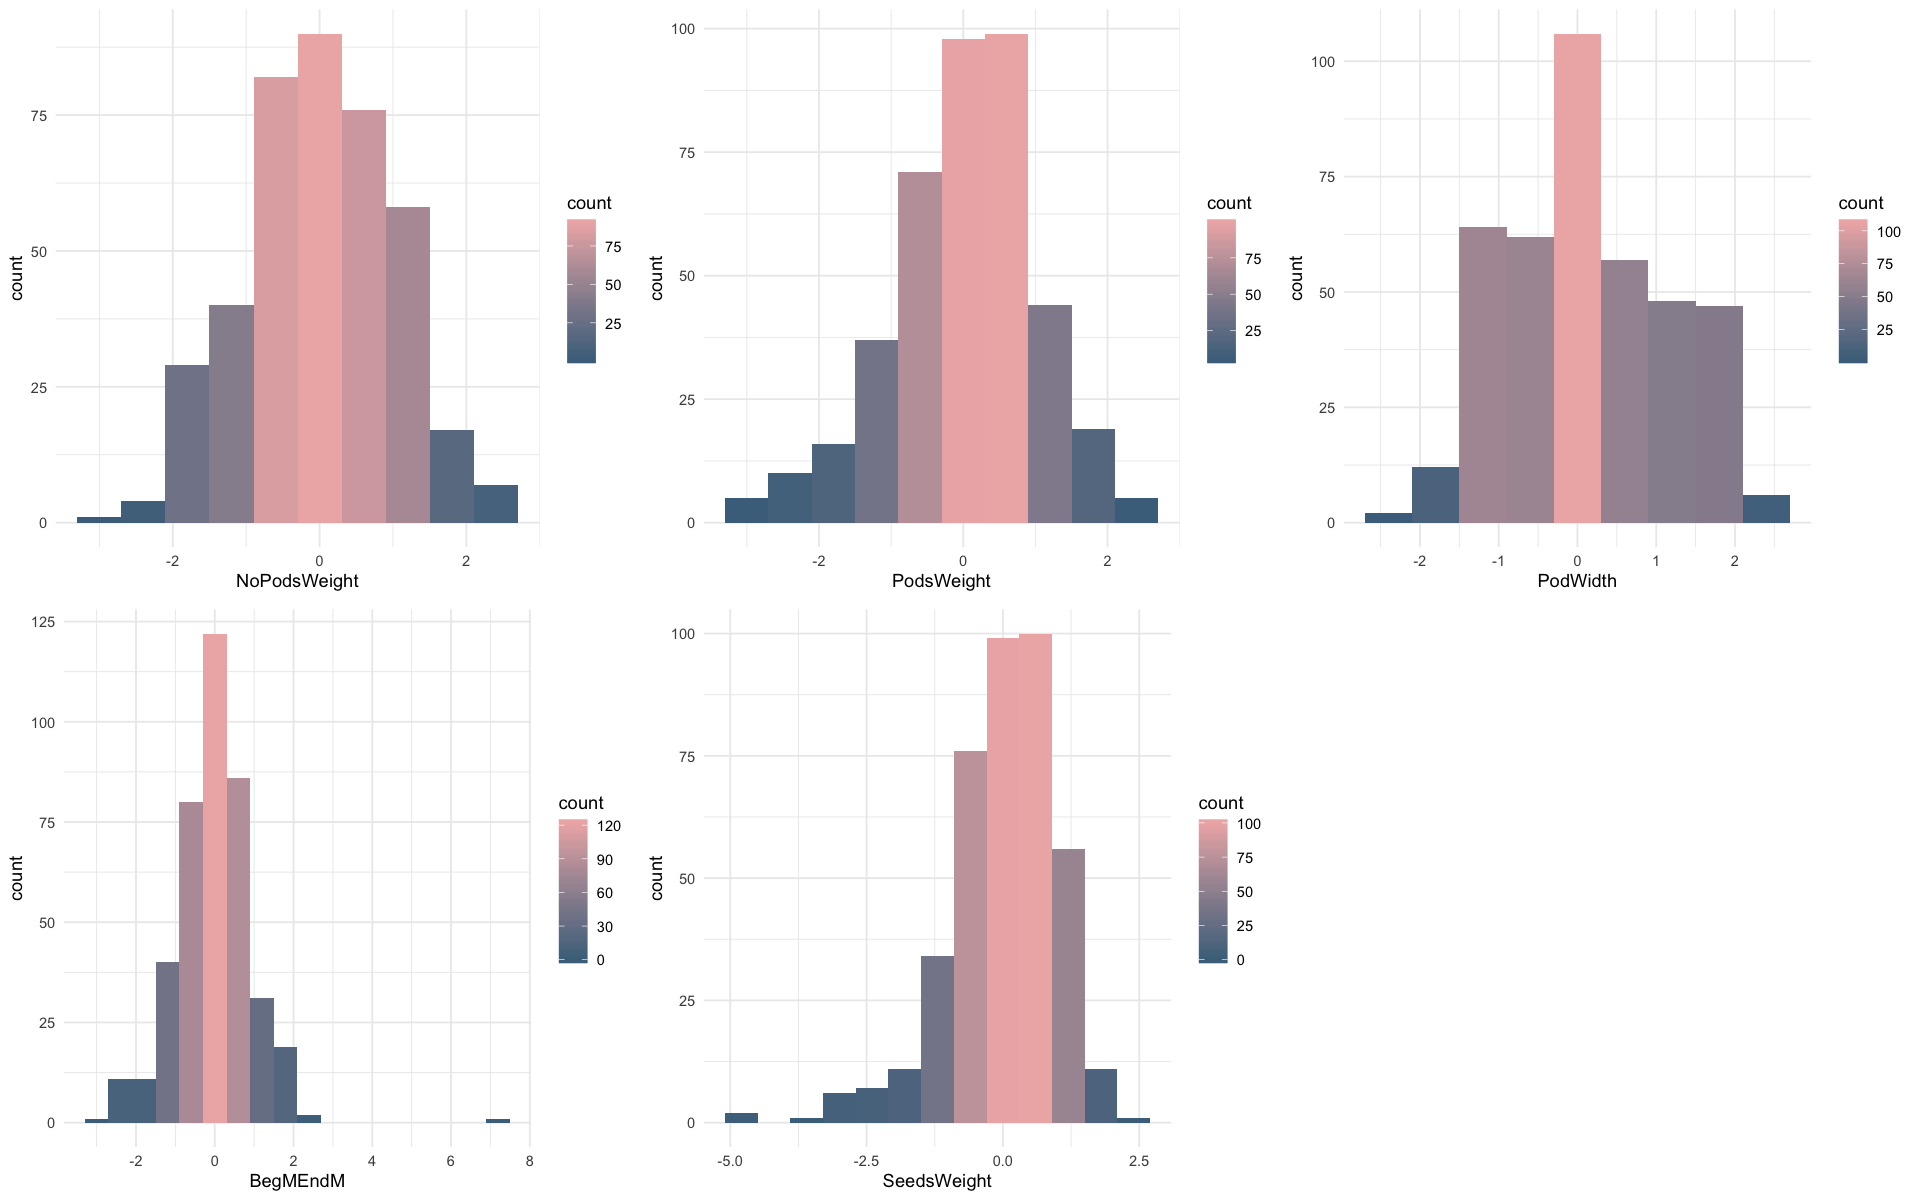

In [8]:
features.norm <- c("NoPodsWeight", "PodsWeight", "PodWidth", "BegMEndM", "SeedsWeight")
p.distribs <- make_hists_grid(df, features.norm)

options(repr.plot.width=16, repr.plot.height=10)
grid.arrange(grobs = p.distribs, ncol =3)

In [9]:
print_test_feature <- function(data, x) {
    print(x)
    cat(paste(paste("Kurtosis:", kurtosis(data[,x])),
              paste("Skewness:", skewness(data[,x])), 
              sep="\n"))
    print(shapiro.test(data[,x]))
}

In [10]:
test_features <- sapply(features.norm, function(x) print_test_feature(df, x))

[1] "NoPodsWeight"
Kurtosis: -0.473024862592494
Skewness: -0.0760364970785348
	Shapiro-Wilk normality test

data:  data[, x]
W = 0.99433, p-value = 0.1396

[1] "PodsWeight"
Kurtosis: 0.242642141037068
Skewness: -0.391772222890322
	Shapiro-Wilk normality test

data:  data[, x]
W = 0.98718, p-value = 0.001247

[1] "PodWidth"
Kurtosis: -0.379965161926644
Skewness: 0.350909841523199
	Shapiro-Wilk normality test

data:  data[, x]
W = 0.95686, p-value = 1.691e-09

[1] "BegMEndM"
Kurtosis: 6.83110027851369
Skewness: 0.647921586826339
	Shapiro-Wilk normality test

data:  data[, x]
W = 0.93189, p-value = 1.287e-12

[1] "SeedsWeight"
Kurtosis: 2.47259086732661
Skewness: -1.0669709107687
	Shapiro-Wilk normality test

data:  data[, x]
W = 0.94584, p-value = 5.464e-11



### Clustering

In [11]:
df[,17:31] <- lapply(df[,17:31], factor)

In [12]:
custom.panel <- function() {
     axis(1, tck=1, col.ticks="light gray")
     axis(1, tck=-0.015, col.ticks="black")
     axis(2, tck=1, col.ticks="light gray")
     axis(2, tck=-0.015)
}

In [13]:
k.vec <- seq(1, 10)
withinss.vec <- c()
for (k in k.vec) {
    cl <- kmeans(df[,-1], centers = k, iter.max = 30, nstart = 30)
    withinss.vec <- c(withinss.vec, sum(cl$withinss))
}

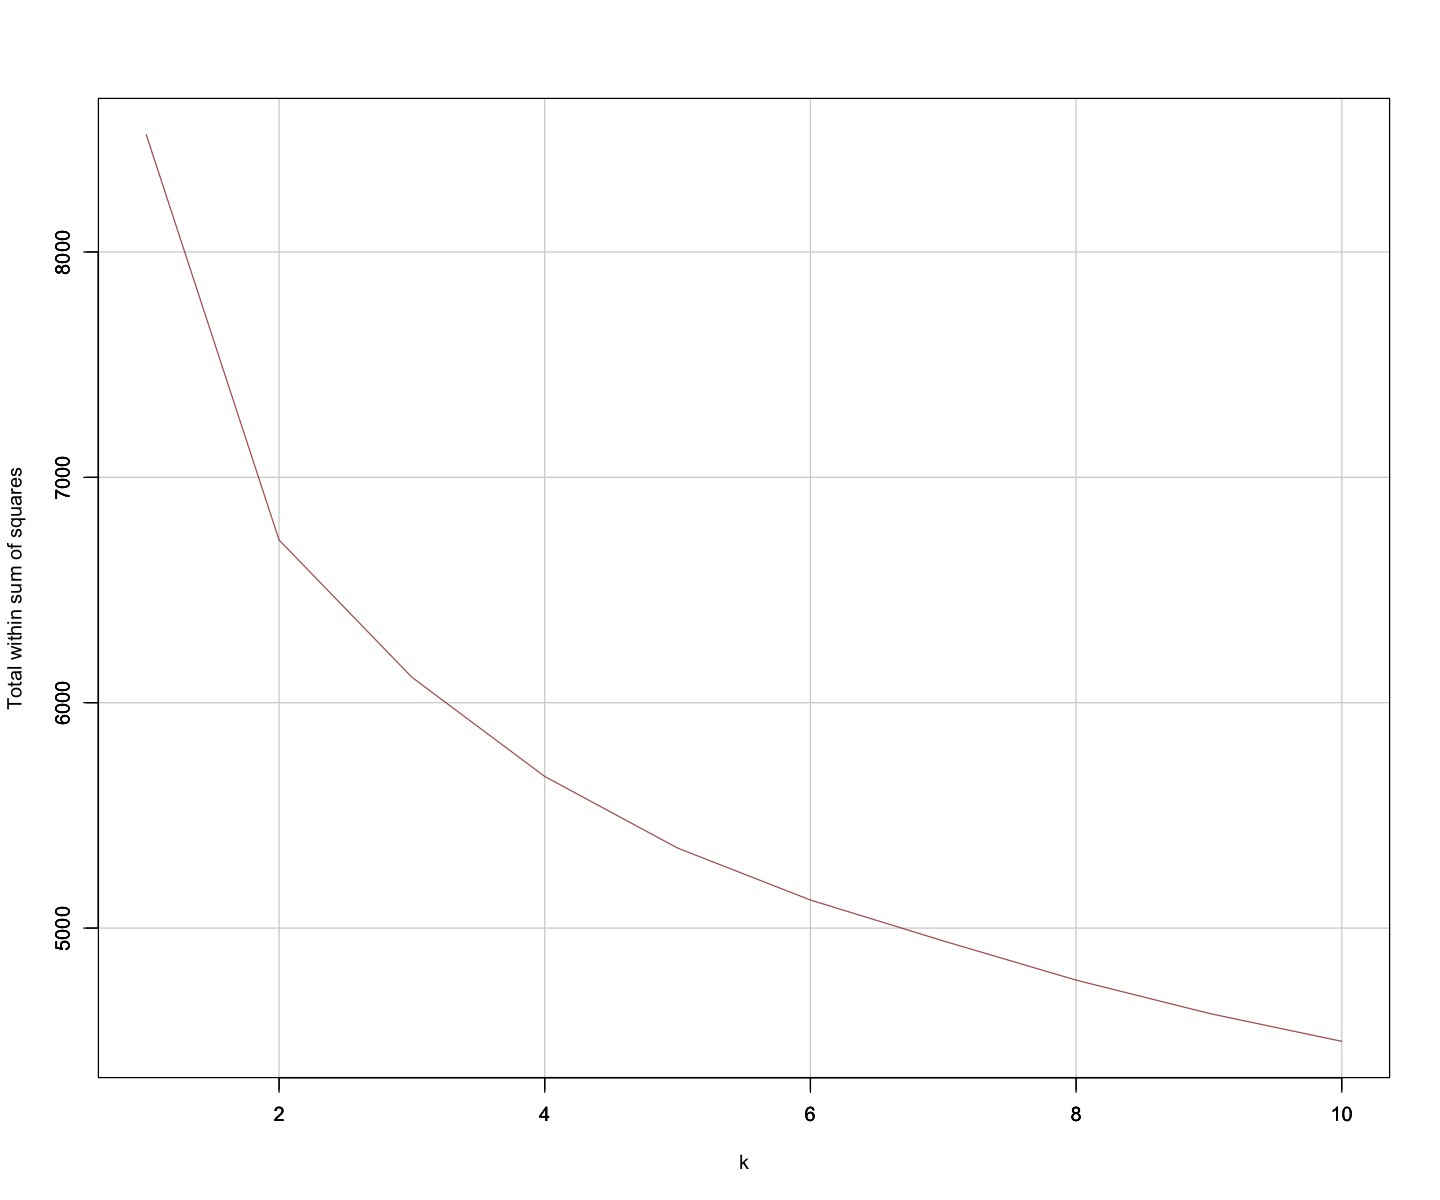

In [14]:
options(repr.plot.width = 12, repr.plot.height = 10)
plot(k.vec, withinss.vec,
     xlab = "k",
     ylab = "Total within sum of squares",
     col = adjustcolor("red4", alpha.f = 0.7),
     pch = 19,
     type = "l",
     panel.first = custom.panel())

We see that 3-4 clusters are sufficient

In [15]:
cl <- kmeans(df[,-1], centers = 3, iter.max = 10, nstart = 20)

In [16]:
df.clusters <- df
df.clusters$Clusters <- cl$cluster

### LDA

In [17]:
lda <- lda(Clusters ~ NoPodsWeight + PodsWeight + PodWidth + BegMEndM + SeedsWeight, 
           df.clusters)
prop.lda <- lda$svd^2 / sum(lda$svd^2)

plda <- predict(object = lda, newdata = df.clusters)
dataset <- data.frame(clusters = df.clusters[, "Clusters"], lda = plda$x)
dataset$clusters <- as.factor(dataset$clusters)
dataset(rbind)

ERROR: Error in dataset(rbind): не могу найти функцию "dataset"


### PCA

In [18]:
pca <- prcomp(~ NoPodsWeight + PodsWeight + PodWidth + BegMEndM + SeedsWeight, 
              df.clusters, center = T, scale = T)

prop.pca <- pca$sdev^2 / sum(pca$sdev^2)
dataset$pca.PC1 <- pca$x[,1]
dataset$pca.PC2 <- pca$x[,2]

In [19]:
means.lda = c()
for (i in seq(1, 3)) {
    means.lda <- c(means.lda, mean(dataset$lda.LD1[dataset$clusters == i]))
    means.lda <- c(means.lda, mean(dataset$lda.LD2[dataset$clusters == i]))
}

means.pca = c()
for (i in seq(1, 3)) {
    means.pca <- c(means.pca, mean(dataset$pca.PC1[dataset$clusters == i]))
    means.pca <- c(means.pca, mean(dataset$pca.PC2[dataset$clusters == i]))
}

In [20]:
Clusters <- c("1", "2", "3")[factor(dataset[, "clusters"])]
colors <- c("plum4", "burlywood2", "coral2")

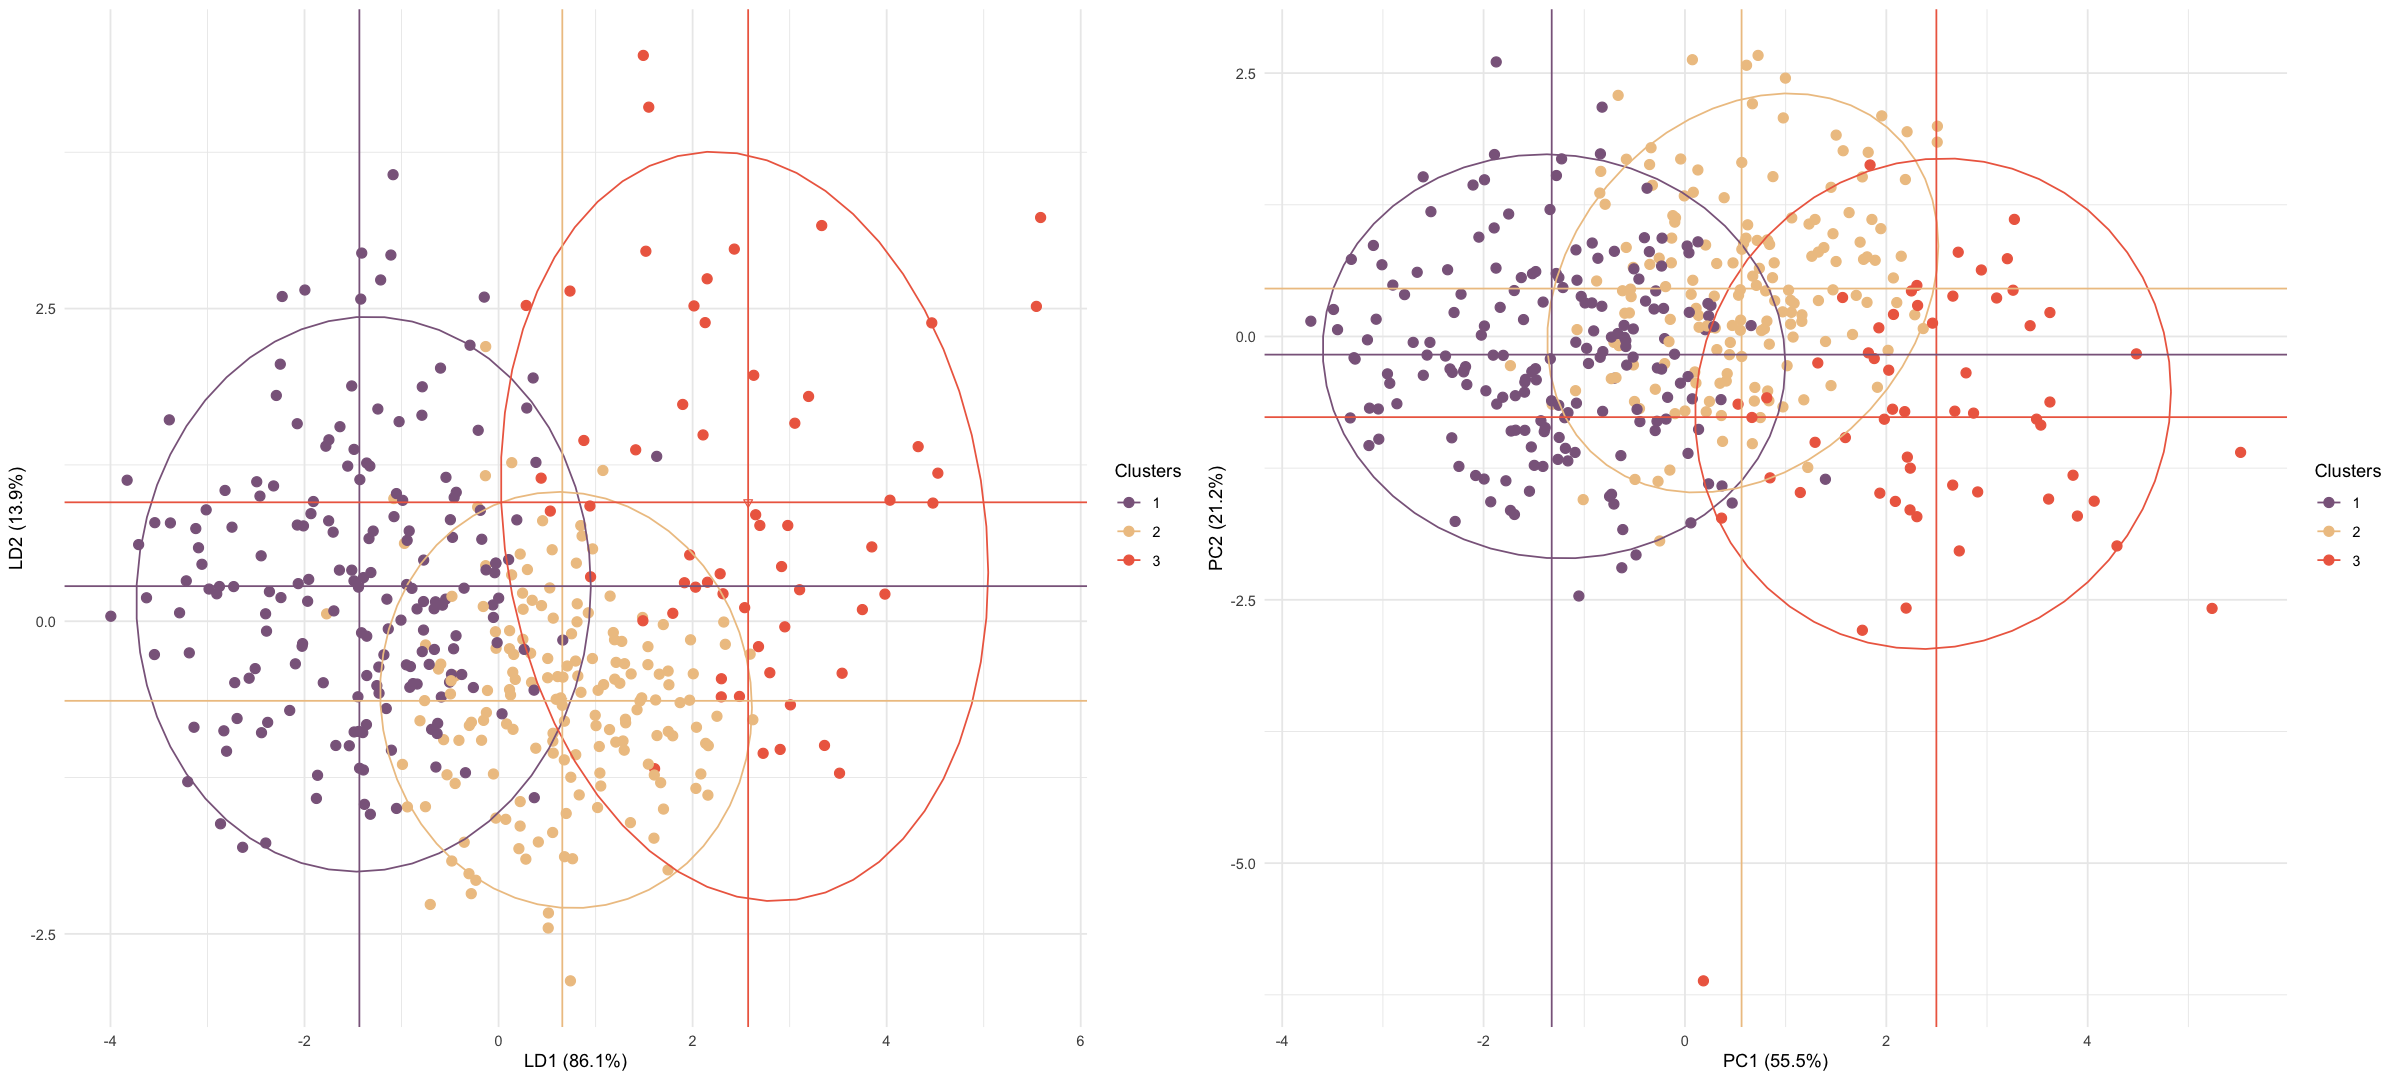

In [21]:
options(repr.plot.width = 20, repr.plot.height = 9)
p.lda <- ggplot(dataset) +
         geom_point(aes(lda.LD1, lda.LD2, colour = Clusters), size = 2.5) +
         stat_ellipse(aes(lda.LD1, lda.LD2, colour = Clusters)) +
         stat_mean(aes(lda.LD1, lda.LD2, colour = Clusters, shape = 25)) +

         geom_vline(xintercept = means.lda[1], color = colors[1]) +
         geom_vline(xintercept = means.lda[3], color = colors[2]) +
         geom_vline(xintercept = means.lda[5], color = colors[3]) +

         geom_hline(yintercept = means.lda[2], color = colors[1]) +
         geom_hline(yintercept = means.lda[4], color = colors[2]) +
         geom_hline(yintercept = means.lda[6], color = colors[3]) +

         scale_color_manual(values = colors) +
         scale_shape_identity() +
         labs(x = paste("LD1 (", percent(prop.lda[1]), ")", sep = ""),
              y = paste("LD2 (", percent(prop.lda[2]), ")", sep = "")) +
         theme_minimal()

p.pca <- ggplot(dataset) +
         geom_point(aes(pca$x[,1], pca$x[,2], colour = Clusters), size = 2.5) +
         stat_ellipse(aes(pca$x[,1], pca$x[,2], colour = Clusters)) +

         geom_vline(xintercept = means.pca[1], color = colors[1]) +
         geom_vline(xintercept = means.pca[3], color = colors[2]) +
         geom_vline(xintercept = means.pca[5], color = colors[3]) +

         geom_hline(yintercept = means.pca[2], color = colors[1]) +
         geom_hline(yintercept = means.pca[4], color = colors[2]) +
         geom_hline(yintercept = means.pca[6], color = colors[3]) +

         scale_color_manual(values = colors) +
         scale_shape_identity() +
         labs(x = paste("PC1 (", percent(prop.pca[1]), ")", sep = ""),
              y = paste("PC2 (", percent(prop.pca[2]), ")", sep = "")) +
         theme_minimal()

grid.arrange(p.lda, p.pca, ncol = 2)